In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import umap
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
# Count the Number of Images in Each Folder

def count_images_in_directory(directory_path):
    count = {}
    for category in os.listdir(directory_path):
        category_path = os.path.join(directory_path, category)
        if os.path.isdir(category_path):
            count[category] = len(os.listdir(category_path))
    return count

train_path = r"C:\Users\ashka\Documents\GP Supervisedlearning\Dataset\TRAIN"
test_path = r"C:\Users\ashka\Documents\GP Supervisedlearning\Dataset\TEST"


train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)

print("Train Image Count:", train_image_count)
print("Test Image Count:", test_image_count)

Train Image Count: {'O': 12565, 'R': 9999}
Test Image Count: {'O': 1401, 'R': 1112}


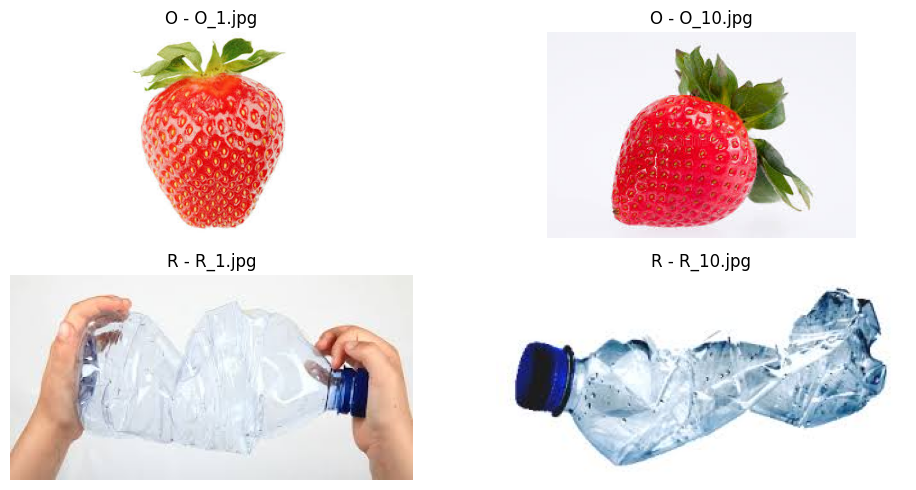

In [3]:
# Visualize a Few Sample Images

def display_sample_images(directory_path, categories=["O", "R"], num_samples=2):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(10, 5))
    
    for i, category in enumerate(categories):
        category_path = os.path.join(directory_path, category)
        images = os.listdir(category_path)[:num_samples]
        
        for j, image_file in enumerate(images):
            img_path = os.path.join(category_path, image_file)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{category} - {image_file}")
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize samples from the training dataset
display_sample_images(train_path)


In [4]:
# Preprocess Images for Machine Learning: Convert the images into numerical arrays, 
# resize them to a consistent shape, and normalize pixel values.

def load_images(directory_path, categories=["O", "R"], image_size=(64, 64)):
    X, y = [], []
    
    for i, category in enumerate(categories):
        category_path = os.path.join(directory_path, category)
        print(f"Processing category: {category}")
        
        for image_file in os.listdir(category_path):
            img_path = os.path.join(category_path, image_file)
            try:
                # Open image and force to RGB (3 channels)
                img = Image.open(img_path).convert("RGB").resize(image_size)
                img_array = np.array(img)
                
                # Ensure that the image shape matches the expected shape (64, 64, 3)
                if img_array.shape == (64, 64, 3):  # Ensure RGB with the right dimensions
                    X.append(img_array.flatten())  # Flatten the image to 1D array
                    y.append(i)  # 0 for O, 1 for R
                
                # Print status every 1000 images processed
                if len(X) % 1000 == 0:
                    print(f"{len(X)} images processed...")
                    
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    return np.array(X), np.array(y)

# Load training data with resized images
X_train, y_train = load_images(train_path)

# Load test data with resized images
X_test, y_test = load_images(test_path)

# After processing all images, add this to print a completion message
X_train, y_train = load_images(train_path)
print(f"Finished processing {len(X_train)} training images.")

X_test, y_test = load_images(test_path)
print(f"Finished processing {len(X_test)} test images.")

Processing category: O
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...
10000 images processed...
11000 images processed...
12000 images processed...
Processing category: R
13000 images processed...
14000 images processed...
15000 images processed...
16000 images processed...
17000 images processed...
18000 images processed...
19000 images processed...
20000 images processed...
21000 images processed...
22000 images processed...
Processing category: O
1000 images processed...
Processing category: R
2000 images processed...
Processing category: O
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...
10000 images processed...
11000 images processe

In [5]:
# Standardize the data before applying PCA
print("Standardizing the training and test data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardize training data
X_test_scaled = scaler.transform(X_test)  # Standardize test data

print("Standardization complete.")

# Apply PCA to reduce the dimensionality
print("Applying PCA...")
pca = PCA(n_components=50)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA complete. Number of components retained: {pca.n_components_}")

Standardizing the training and test data...
Standardization complete.
Applying PCA...
PCA complete. Number of components retained: 50


In [6]:
# Logistic Regression Model: Train a logistic regression model and evaluate its performance.

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test_pca)

# Evaluate the model
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Results
Accuracy: 0.8678869876641464
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1401
           1       0.91      0.78      0.84      1112

    accuracy                           0.87      2513
   macro avg       0.88      0.86      0.86      2513
weighted avg       0.87      0.87      0.87      2513



In [7]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_pca)

# Evaluate the model
print("KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Results
Accuracy: 0.8117787504974134
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1401
           1       0.81      0.75      0.78      1112

    accuracy                           0.81      2513
   macro avg       0.81      0.81      0.81      2513
weighted avg       0.81      0.81      0.81      2513



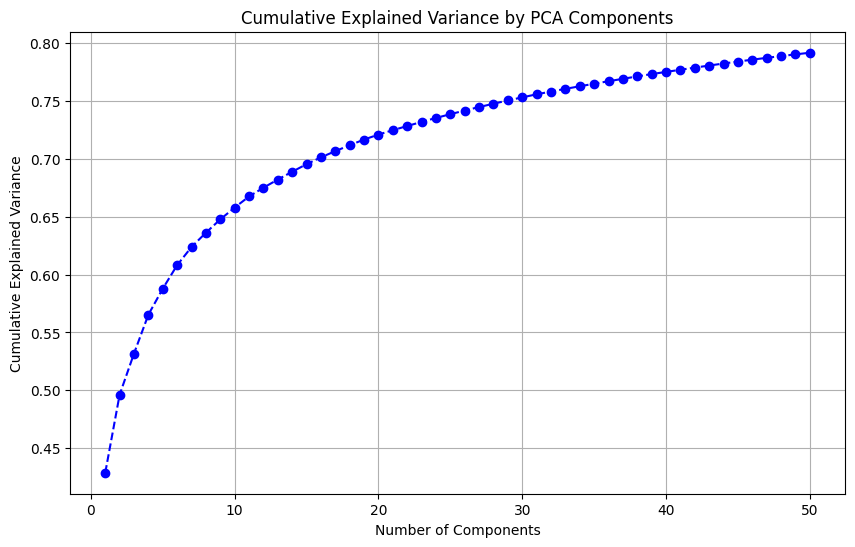

In [8]:
# Plot the explained variance ratio of each PCA component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Logistic Regression (All PCA Components) Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1401
           1       0.91      0.78      0.84      1112

    accuracy                           0.87      2513
   macro avg       0.88      0.86      0.86      2513
weighted avg       0.87      0.87      0.87      2513

Accuracy: 86.79%


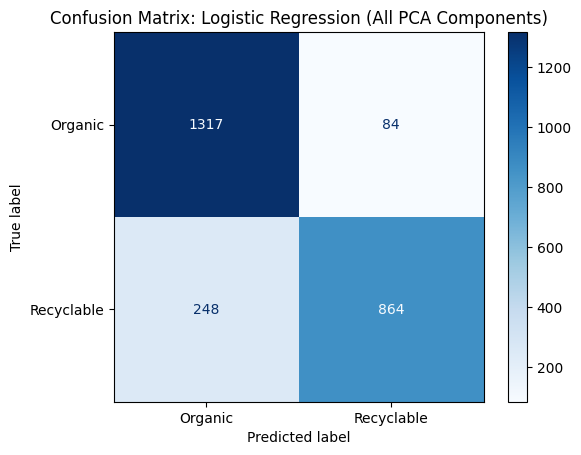

In [9]:
# Train Logistic Regression on all PCA components
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train_pca, y_train)

# Predict on test data
y_pred_full = log_reg_full.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_full)

# Evaluate the model
print("Logistic Regression (All PCA Components) Results:")
print("Classification Report:\n", classification_report(y_test, y_pred_full))
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Organic', 'Recyclable'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Logistic Regression (All PCA Components)')
plt.show()